# Geo analysis of flights

## Libraries

In [1]:
import geopandas as gpd
import pandas as pd
import json
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10, 8]

## Data source
https://github.com/hadley/nycflights13

## Load data

In [2]:
planes = pd.read_csv('Dane\\planes.txt', sep='\t')

with open('Dane\\airports.json') as f:
    airports_json = json.load(f)
    
airports = pd.DataFrame(airports_json)

weather = pd.read_csv(r'Dane\weather.csv', sep=';')

flights = pd.read_excel('Dane\\flights.xlsx')

In [3]:
# Load .shp file
states = gpd.read_file(r'Dane\us_states\cb_2018_us_state_20m.shp')

Cannot find header.dxf (GDAL_DATA is not defined)


In [4]:
type(states)

geopandas.geodataframe.GeoDataFrame

In [5]:
states.head()

,region,state_id,state_shor,state_name,geometry
0,South,24,MD,Maryland,"MULTIPOLYGON (((-76.04621 38.02553, -76.00734 ..."
1,Midwest,19,IA,Iowa,"POLYGON ((-96.62187 42.77925, -96.57794 42.827..."
2,South,10,DE,Delaware,"POLYGON ((-75.77379 39.72220, -75.75323 39.757..."
3,Midwest,39,OH,Ohio,"MULTIPOLYGON (((-82.86334 41.69369, -82.82572 ..."
4,Midwest,42,PA,Pennsylvania,"POLYGON ((-80.51989 40.90666, -80.51964 40.987..."


<Axes: >

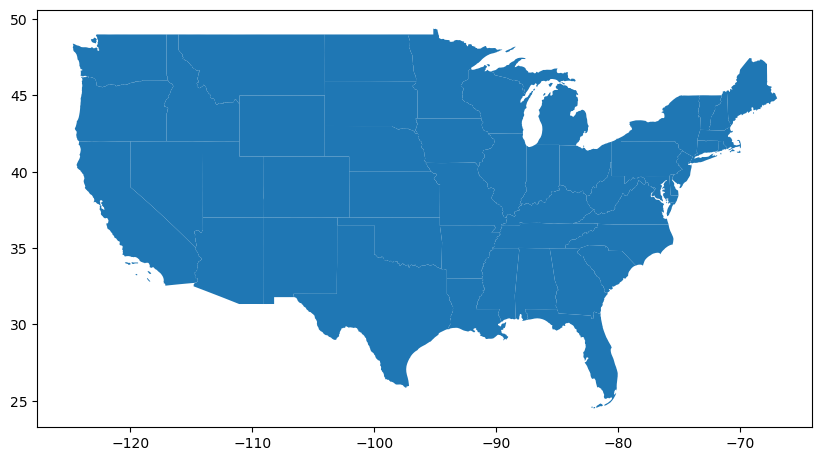

In [6]:
# Plot states
states.plot()

<Axes: >

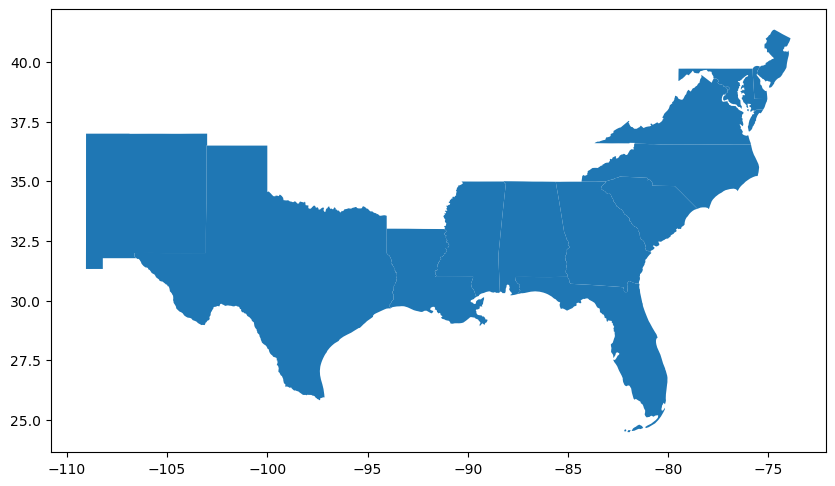

In [7]:
# Plot south regions
states[states['region'] == 'South'].plot()

In [8]:
# Set CRS (Coordinate Reference System)
states = states.to_crs('EPSG:4326')

<Axes: >

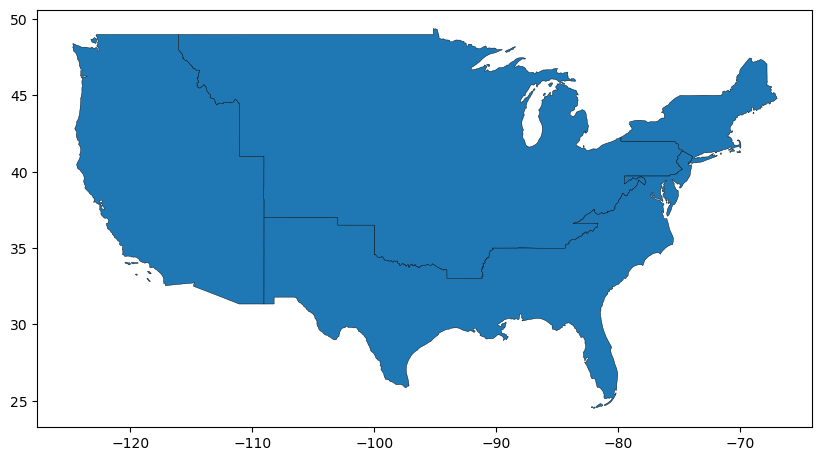

In [9]:
# Check division by cardinal directions
states[['region', 'geometry']].dissolve('region', 'sum').reset_index().plot(linewidth=0.3, edgecolor='black')

In [10]:
type(airports)

pandas.core.frame.DataFrame

In [11]:
airports

,faa,name,lat,lon,alt,tz,dst,tzone
0,04G,Lansdowne Airport,41.130472,-80.619583,1044,-5,A,America/New_York
1,06A,Moton Field Municipal Airport,32.460572,-85.680028,264,-6,A,America/Chicago
2,06C,Schaumburg Regional,41.989341,-88.101243,801,-6,A,America/Chicago
3,06N,Randall Airport,41.431912,-74.391561,523,-5,A,America/New_York
4,09J,Jekyll Island Airport,31.074472,-81.427778,11,-5,A,America/New_York
...,...,...,...,...,...,...,...,...
1453,ZUN,Black Rock,35.083228,-108.791778,6454,-7,A,America/Denver
1454,ZVE,New Haven Rail Station,41.298669,-72.925992,7,-5,A,America/New_York
1455,ZWI,Wilmington Amtrak Station,39.736667,-75.551667,0,-5,A,America/New_York
1456,ZWU,Washington Union Station,38.897460,-77.006430,76,-5,A,America/New_York


In [12]:
# Change Pandas DataFrame to Geopandas GeoDataFrame
airports_gdf = gpd.GeoDataFrame(airports, geometry=gpd.points_from_xy(airports.lon, airports.lat), crs='EPSG:4326')

In [13]:
# Check CRS (Coordinate Reference System)
airports_gdf.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [14]:
airports_gdf

,faa,name,lat,lon,alt,tz,dst,tzone,geometry
0,04G,Lansdowne Airport,41.130472,-80.619583,1044,-5,A,America/New_York,POINT (-80.61958 41.13047)
1,06A,Moton Field Municipal Airport,32.460572,-85.680028,264,-6,A,America/Chicago,POINT (-85.68003 32.46057)
2,06C,Schaumburg Regional,41.989341,-88.101243,801,-6,A,America/Chicago,POINT (-88.10124 41.98934)
3,06N,Randall Airport,41.431912,-74.391561,523,-5,A,America/New_York,POINT (-74.39156 41.43191)
4,09J,Jekyll Island Airport,31.074472,-81.427778,11,-5,A,America/New_York,POINT (-81.42778 31.07447)
...,...,...,...,...,...,...,...,...,...
1453,ZUN,Black Rock,35.083228,-108.791778,6454,-7,A,America/Denver,POINT (-108.79178 35.08323)
1454,ZVE,New Haven Rail Station,41.298669,-72.925992,7,-5,A,America/New_York,POINT (-72.92599 41.29867)
1455,ZWI,Wilmington Amtrak Station,39.736667,-75.551667,0,-5,A,America/New_York,POINT (-75.55167 39.73667)
1456,ZWU,Washington Union Station,38.897460,-77.006430,76,-5,A,America/New_York,POINT (-77.00643 38.89746)


<Axes: >

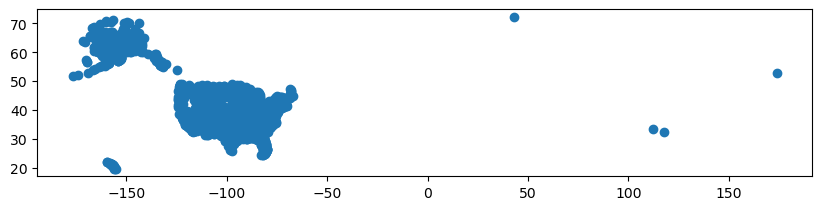

In [15]:
# Plot all airports
airports_gdf.plot()

## US airports count geographic heat map 

In [16]:
# Join airports and states
joined = gpd.sjoin(states, airports_gdf)
joined.head()

,region,state_id,state_shor,state_name,geometry,index_right,faa,name,lat,lon,alt,tz,dst,tzone
0,South,24,MD,Maryland,"MULTIPOLYGON (((-76.04621 38.02553, -76.00733 ...",961,NHK,Patuxent River Nas,38.285981,-76.411781,39,-5,A,America/New_York
0,South,24,MD,Maryland,"MULTIPOLYGON (((-76.04621 38.02553, -76.00733 ...",1196,SBY,Salisbury Ocean City Wicomico Rgnl,38.340525,-75.510289,52,-5,A,America/New_York
0,South,24,MD,Maryland,"MULTIPOLYGON (((-76.04621 38.02553, -76.00733 ...",452,ESN,Easton-Newnam Field Airport,38.804167,-76.069000,72,-5,A,America/New_York
0,South,24,MD,Maryland,"MULTIPOLYGON (((-76.04621 38.02553, -76.00733 ...",99,ADW,Andrews Afb,38.810806,-76.867028,280,-5,A,America/New_York
0,South,24,MD,Maryland,"MULTIPOLYGON (((-76.04621 38.02553, -76.00733 ...",132,ANP,Lee Airport,38.942778,-76.568333,34,-5,A,America/New_York


In [17]:
# Group by states and airports count
states_airports = joined.groupby('state_name')\
                        .agg({'faa' : 'count', 
                              'geometry' : 'last'}).reset_index()\
                        .rename({'faa' : 'airports_count'}, axis='columns')
states_airports.head()

,state_name,airports_count,geometry
0,Alabama,23,"POLYGON ((-88.46866 31.89385, -88.46866 31.933..."
1,Arizona,39,"POLYGON ((-114.79968 32.59362, -114.80939 32.6..."
2,Arkansas,13,"POLYGON ((-94.61792 36.49941, -94.36120 36.499..."
3,California,98,"MULTIPOLYGON (((-118.59397 33.46720, -118.4847..."
4,Colorado,26,"POLYGON ((-109.05996 38.49999, -109.05151 39.1..."


In [18]:
# Change type to GeoDataFrame
states_airports_gdf = gpd.GeoDataFrame(states_airports, geometry='geometry', crs=joined.crs)

In [19]:
# Sort by airports_count asc
states_airports_gdf.sort_values('airports_count', ascending=False)

,state_name,airports_count,geometry
3,California,98,"MULTIPOLYGON (((-118.59397 33.46720, -118.4847..."
8,Florida,90,"MULTIPOLYGON (((-81.81170 24.56874, -81.75127 ..."
41,Texas,75,"POLYGON ((-106.62345 31.91403, -106.63011 31.9..."
9,Georgia,57,"POLYGON ((-85.60517 34.98468, -85.47434 34.983..."
30,New York,46,"MULTIPOLYGON (((-72.01892 41.27411, -71.92680 ..."
45,Washington,44,"MULTIPOLYGON (((-123.23715 48.68347, -123.0704..."
20,Michigan,42,"MULTIPOLYGON (((-84.61622 45.89447, -84.51790 ..."
33,Ohio,41,"MULTIPOLYGON (((-82.86333 41.69369, -82.82571 ..."
1,Arizona,39,"POLYGON ((-114.79968 32.59362, -114.80939 32.6..."
47,Wisconsin,36,"MULTIPOLYGON (((-86.93428 45.42115, -86.83575 ..."


<Axes: >

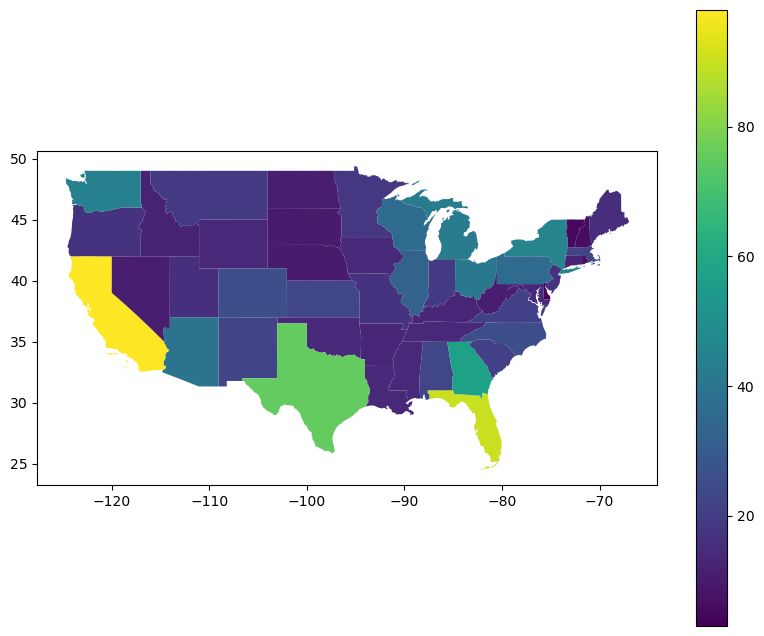

In [20]:
# Create airport count heat map
states_airports_gdf.plot(column='airports_count', legend=True)

In [21]:
# https://geopandas.org/docs/user_guide/mapping.html

## Flights count by airports map

<Axes: >

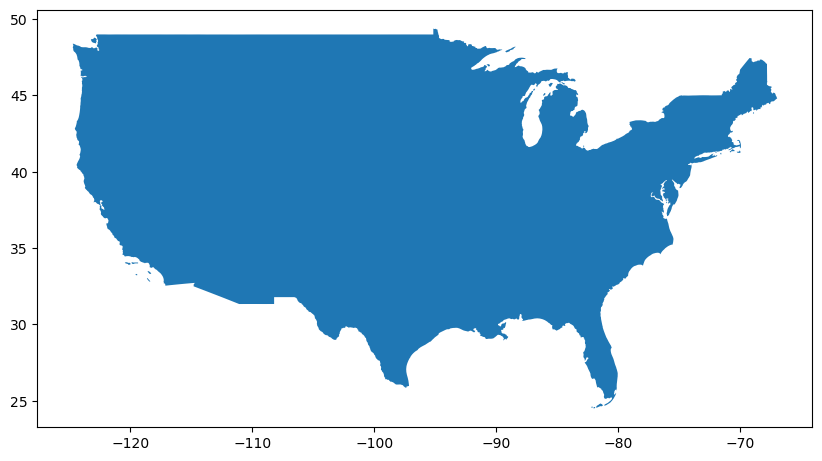

In [22]:
# Add grouped column with us value to later be merged 
states['gr'] = 'us'
all_states = states[['gr', 'geometry']].dissolve('gr', 'sum').reset_index()
all_states.plot()

In [23]:
# Filter airports inside USA (get rid of islands)
airports_usa_gdf = gpd.overlay(airports_gdf, states, how='intersection')

In [24]:
# Group by destination airports and count flights
flights_count = flights.groupby('dest')\
                       .agg({'flight' : 'count'}).reset_index()

In [25]:
# Join airports_usa_gdf and flights_count DataFrames (only airports with at least one flight)
airports_flights_count = airports_usa_gdf.merge(flights_count, left_on='faa', right_on='dest')

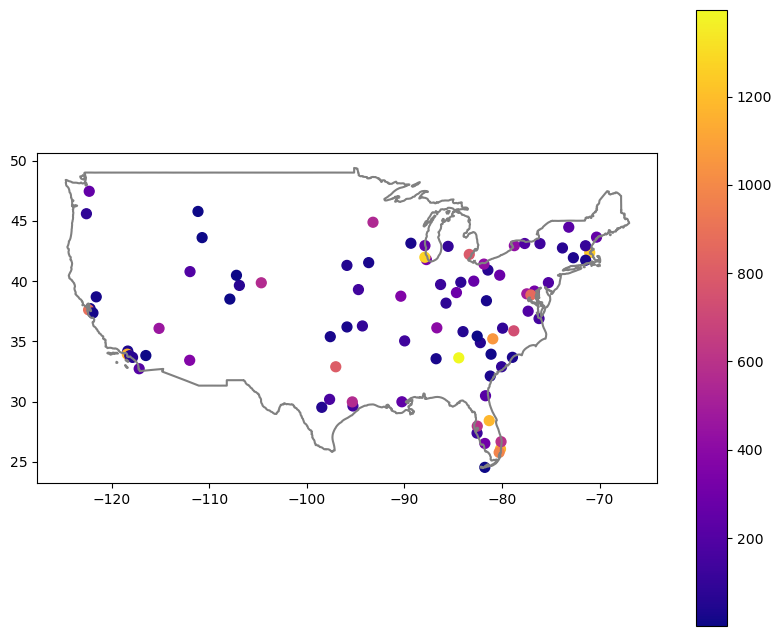

In [26]:
# Create map
base = all_states.boundary.plot(color='gray')
airports_flights_count.plot(column='flight', ax=base, legend=True, markersize=50, cmap='plasma')
plt.show()

## Good weather flights heat map

In [27]:
# Add column with temperature in Celsius 
weather['temp_C'] = weather.temp.apply(lambda x: 5/9*(x-32))

In [28]:
# Check if weather was good (1 - good, 0 - bad)
def is_good_weather(row, mean_wind_speed):
    if row['visib'] < 5:
        return 0
    if row['temp_C'] < -5:
        return 0
    if row['wind_speed'] > mean_wind_speed and row['wind_gust'] > 10:
        return 0
    return 1

weather['good_weather'] = weather.apply(lambda x: is_good_weather(x, weather['wind_speed'].mean()), axis='columns')
weather['good_weather']

0       1
1       1
2       1
3       1
4       1
       ..
2221    0
2222    0
2223    0
2224    0
2225    0
Name: good_weather, Length: 2226, dtype: int64

In [29]:
# Select needed columns
flights_short = flights[['flight', 'origin', 'dest', 'day', 'hour']]

In [30]:
# Add weather rate to flights' departure airport
# (if no information about weather assume good_weather = 1)  
flights_weather = flights_short.merge(weather[['origin_code', 'day', 'hour', 'good_weather']]\
                                                    .rename({'origin_code' : 'origin'}, axis='columns'), 
                                                     on=['origin', 'day', 'hour'], how='left')
flights_weather = flights_weather.fillna(1)

In [31]:
# Assign geometry to destination airport
flights_weather_gdf = gpd.GeoDataFrame(flights_weather.merge(airports_gdf[['faa', 'geometry']], left_on='dest', right_on='faa'), 
                                       geometry='geometry', crs=airports_gdf.crs)

In [32]:
# Assign state to flights' destination airport
flights_weather_states_gdf = gpd.sjoin(flights_weather_gdf, states)

In [33]:
# Count percent of flights with good weather
def pr_func(values):
    return sum(values)/len(values)

good_weather_pr = flights_weather_states_gdf.groupby('state_name')\
                                            .agg({'good_weather' : pr_func}).reset_index()
good_weather_pr.head()

,state_name,good_weather
0,Alabama,0.600000
1,Arizona,0.604336
2,Arkansas,0.621053
3,California,0.633889
4,Colorado,0.570300


<Axes: >

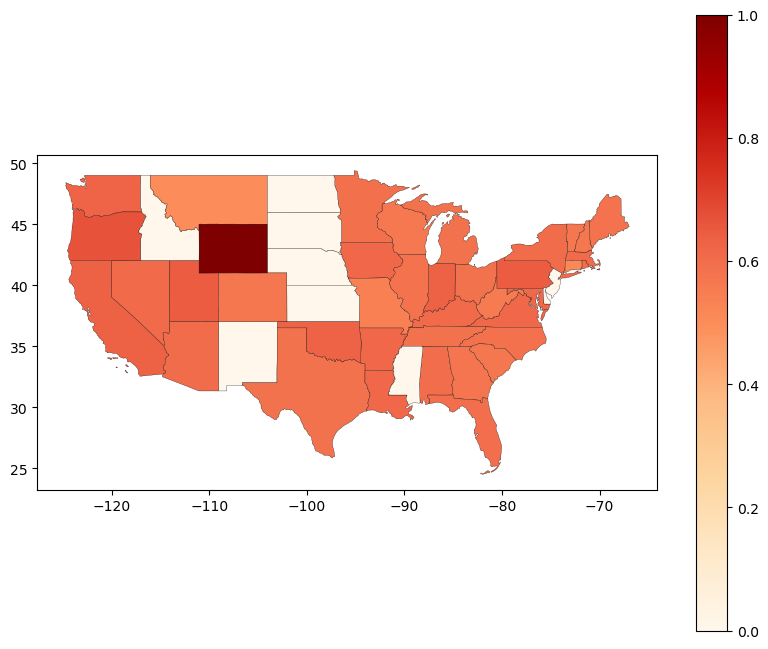

In [34]:
# If no flights to a state - percentage of good_wether = 0
states.merge(good_weather_pr, on='state_name', how='left').fillna(0).plot(column='good_weather', 
                                                                          cmap='OrRd', 
                                                                          legend=True, 
                                                                          linewidth=0.2, 
                                                                          edgecolor='black')